In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
df=pd.read_csv('/content/drive/MyDrive/Dataset_EDA/Blinkit.csv')

In [47]:
df

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0


In [48]:
df.shape

(8523, 12)

In [49]:
df.dtypes

,0
Item Fat Content,object
Item Identifier,object
Item Type,object
Outlet Establishment Year,int64
Outlet Identifier,object
Outlet Location Type,object
Outlet Size,object
Outlet Type,object
Item Visibility,float64
Item Weight,float64


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [51]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2016.450546,0.066132,12.857645,140.992783,3.965857
std,3.189396,0.051598,4.643456,62.275067,0.605651
min,2011.000000,0.000000,4.555000,31.290000,1.000000
25%,2014.000000,0.026989,8.773750,93.826500,4.000000
50%,2016.000000,0.053931,12.600000,143.012800,4.000000
75%,2018.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


In [52]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [53]:
string_columns = df.select_dtypes(include=['object'])  #to get columns with string data
for column in string_columns:
    unique_values = df[column].unique()  # Get unique values in each column
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'Item Fat Content': ['Regular' 'Low Fat' 'low fat' 'LF' 'reg']
Unique values in 'Item Identifier': ['FDX32' 'NCB42' 'FDR28' ... 'FDU60' 'NCX53' 'FDE52']
Unique values in 'Item Type': ['Fruits and Vegetables' 'Health and Hygiene' 'Frozen Foods' 'Canned'
 'Soft Drinks' 'Household' 'Snack Foods' 'Meat' 'Breads' 'Hard Drinks'
 'Others' 'Dairy' 'Breakfast' 'Baking Goods' 'Seafood' 'Starchy Foods']
Unique values in 'Outlet Identifier': ['OUT049' 'OUT018' 'OUT046' 'OUT013' 'OUT045' 'OUT017' 'OUT010' 'OUT027'
 'OUT035' 'OUT019']
Unique values in 'Outlet Location Type': ['Tier 1' 'Tier 3' 'Tier 2']
Unique values in 'Outlet Size': ['Medium' 'Small' 'High']
Unique values in 'Outlet Type': ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [54]:
#Standardizing
df['Item Fat Content']=df['Item Fat Content'].replace({
    'low fat':'Low Fat',
    'LF':'Low Fat',
    'reg':'Regular'
})
print(df['Item Fat Content'].unique())  #Verifying

['Regular' 'Low Fat']


Null checking

In [55]:
df.isnull().sum()

,0
Item Fat Content,0
Item Identifier,0
Item Type,0
Outlet Establishment Year,0
Outlet Identifier,0
Outlet Location Type,0
Outlet Size,0
Outlet Type,0
Item Visibility,0
Item Weight,1463


In [56]:
df.drop(columns=['Item Weight'], inplace=True)  #"Dropped the 'Item Weight' column as it is not relevant to the primary analysis objectives and contains 1000+ missing values.

In [57]:
df

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8518,Low Fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,164.5526,4.0
8519,Low Fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,241.6828,4.0
8520,Low Fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,86.6198,4.0
8521,Regular,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,97.8752,4.0


Unwanted space handling

In [58]:
df['Item Identifier'] = df['Item Identifier'].str.strip()  # Removeing unwanted spaces

In [59]:
df['Item Type'] = df['Item Type'].str.strip()

In [60]:
df['Outlet Type'] = df['Outlet Type'].str.strip()

Duplicate checking

In [61]:
print(df.duplicated().sum())  # Count the number of duplicates

0


In [62]:
# Check unique values after stripping spaces
print(df['Outlet Type'].unique())

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [63]:
# Check for missing values
print(df['Outlet Type'].isnull().sum())


0


Value counts

In [64]:
# Check the value counts for 'Outlet Type'
print(df['Outlet Type'].value_counts())


Outlet Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64


In [65]:
# Check the value count of all categorical columns:
for i in df:
  if df[i].dtype=='object':
    print(df[i].value_counts())
    print('------------------------')

Item Fat Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64
------------------------
Item Identifier
FDW13    10
FDG33    10
FDF56     9
FDF52     9
FDV38     9
         ..
FDK57     1
FDO33     1
DRF48     1
FDC23     1
FDE52     1
Name: count, Length: 1559, dtype: int64
------------------------
Item Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64
------------------------
Outlet Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OU

Feature Engineering

In [66]:
df['Year_count']=2024-df['Outlet Establishment Year']
df

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Sales,Rating,Year_count
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,145.4786,5.0,12
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,115.3492,5.0,2
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,165.0210,5.0,8
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,126.5046,5.0,10
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,55.1614,5.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,Low Fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,164.5526,4.0,6
8519,Low Fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,241.6828,4.0,6
8520,Low Fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,86.6198,4.0,6
8521,Regular,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,97.8752,4.0,6


In [67]:
df['sales_by_outlet']=df.groupby('Outlet Identifier')['Sales'].transform('sum')
df

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Sales,Rating,Year_count,sales_by_outlet
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,145.4786,5.0,12,130476.8598
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,115.3492,5.0,2,131477.7764
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,165.0210,5.0,8,132113.3698
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,126.5046,5.0,10,131809.0156
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,55.1614,5.0,9,130942.7802
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,Low Fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,164.5526,4.0,6,130714.6746
8519,Low Fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,241.6828,4.0,6,130714.6746
8520,Low Fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,86.6198,4.0,6,130714.6746
8521,Regular,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,97.8752,4.0,6,130714.6746


In [68]:
df['Avg Rating by Outlet'] = df.groupby('Outlet Identifier')['Rating'].transform('mean')  #Transform->useful when you want to apply a group-level computation but still retain the original structure of the DataFrame

In [69]:
df['Avg Sales by Item Type'] = df.groupby('Item Type')['Sales'].transform('mean')

In [70]:
df

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Sales,Rating,Year_count,sales_by_outlet,Avg Rating by Outlet,Avg Sales by Item Type
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,145.4786,5.0,12,130476.8598,3.985484,144.581235
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,115.3492,5.0,2,131477.7764,3.971228,130.818921
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,165.0210,5.0,8,132113.3698,3.958387,138.503366
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,126.5046,5.0,10,131809.0156,3.949571,139.763835
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,55.1614,5.0,9,130942.7802,3.959957,131.492510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,Low Fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,164.5526,4.0,6,130714.6746,3.952941,130.818921
8519,Low Fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,241.6828,4.0,6,130714.6746,3.952941,146.194935
8520,Low Fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,86.6198,4.0,6,130714.6746,3.952941,131.492510
8521,Regular,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,97.8752,4.0,6,130714.6746,3.952941,148.499211


In [71]:
df.corr(numeric_only=True)

,Outlet Establishment Year,Item Visibility,Sales,Rating,Year_count,sales_by_outlet,Avg Rating by Outlet,Avg Sales by Item Type
Outlet Establishment Year,1.000000,-0.058087,-0.000654,0.000414,-1.000000,0.219511,0.016160,-0.007903
Item Visibility,-0.058087,1.000000,-0.001315,0.000798,0.058087,-0.286679,0.151514,0.020426
Sales,-0.000654,-0.001315,1.000000,0.011329,0.000654,0.005321,-0.011403,0.111672
Rating,0.000414,0.000798,0.011329,1.000000,-0.000414,-0.013726,0.025595,-0.000576
Year_count,-1.000000,0.058087,0.000654,-0.000414,1.000000,-0.219511,-0.016160,0.007903
sales_by_outlet,0.219511,-0.286679,0.005321,-0.013726,-0.219511,1.000000,-0.536259,0.003511
Avg Rating by Outlet,0.016160,0.151514,-0.011403,0.025595,-0.016160,-0.536259,1.000000,-0.004613
Avg Sales by Item Type,-0.007903,0.020426,0.111672,-0.000576,0.007903,0.003511,-0.004613,1.000000


Outlier Detection

In [72]:
# Step 1: Calculate Q1, Q3 and IQR
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Identify outliers
outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]

print("Outliers:\n", outliers)

Outliers:
 Empty DataFrame
Columns: [Item Fat Content, Item Identifier, Item Type, Outlet Establishment Year, Outlet Identifier, Outlet Location Type, Outlet Size, Outlet Type, Item Visibility, Sales, Rating, Year_count, sales_by_outlet, Avg Rating by Outlet, Avg Sales by Item Type]
Index: []


# **Data Analysis**

In [73]:
obj_l=[]
num_l=[]
for i in df:
  if df[i].dtype=="int" or df[i].dtype=="float":
    num_l.append(i)
  else:
    obj_l.append(i)

In [74]:
obj_l

['Item Fat Content',
 'Item Identifier',
 'Item Type',
 'Outlet Identifier',
 'Outlet Location Type',
 'Outlet Size',
 'Outlet Type']

In [75]:
num_l

['Outlet Establishment Year',
 'Item Visibility',
 'Sales',
 'Rating',
 'Year_count',
 'sales_by_outlet',
 'Avg Rating by Outlet',
 'Avg Sales by Item Type']

**Univariate** **Analysis**

In [76]:
#gives you basic statistics, such as mean, median, min, max, and standard deviation.
for column in num_l:
    print(f"Statistical Functions for '{column}':")
    print("-------------------------------------")
    print(f"Minimum: {df[column].min()}")
    print(f"Maximum: {df[column].max()}")
    print(f"Mean: {df[column].mean():.2f}")
    print(f"Mode: {df[column].mode()[0]}")  # Mode returns a series; take the first value
    print(f"Median: {df[column].median()}")
    print(f"Standard Deviation: {df[column].std():.2f}")
    print(f"Variance: {df[column].var():.2f}")
    print("_______________________________\n")

Statistical Functions for 'Outlet Establishment Year':
-------------------------------------
Minimum: 2011
Maximum: 2022
Mean: 2016.45
Mode: 2018
Median: 2016.0
Standard Deviation: 3.19
Variance: 10.17
_______________________________

Statistical Functions for 'Item Visibility':
-------------------------------------
Minimum: 0.0
Maximum: 0.328390948
Mean: 0.07
Mode: 0.0
Median: 0.053930934
Standard Deviation: 0.05
Variance: 0.00
_______________________________

Statistical Functions for 'Sales':
-------------------------------------
Minimum: 31.29
Maximum: 266.8884
Mean: 140.99
Mode: 172.0422
Median: 143.0128
Standard Deviation: 62.28
Variance: 3878.18
_______________________________

Statistical Functions for 'Rating':
-------------------------------------
Minimum: 1.0
Maximum: 5.0
Mean: 3.97
Mode: 4.0
Median: 4.0
Standard Deviation: 0.61
Variance: 0.37
_______________________________

Statistical Functions for 'Year_count':
-------------------------------------
Minimum: 2
Maximum: 13

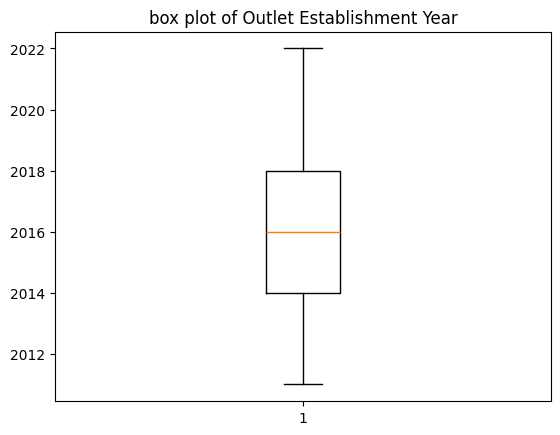

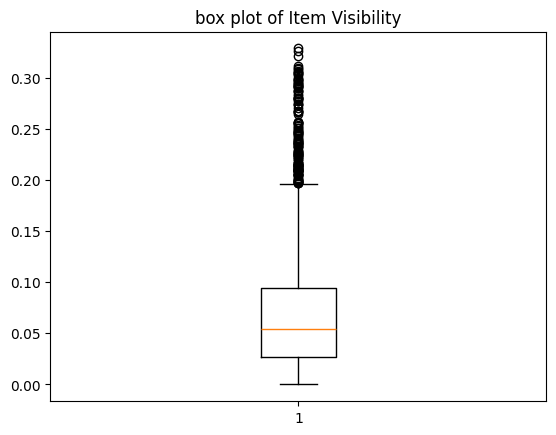

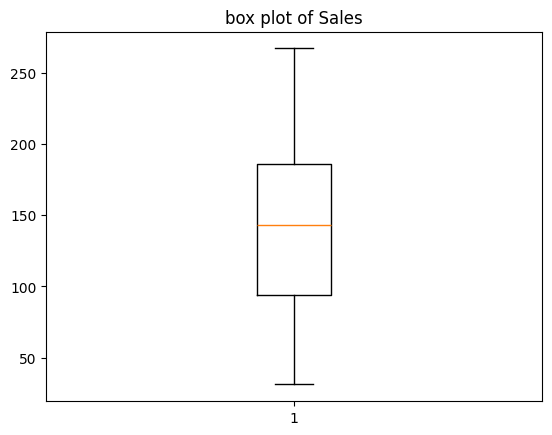

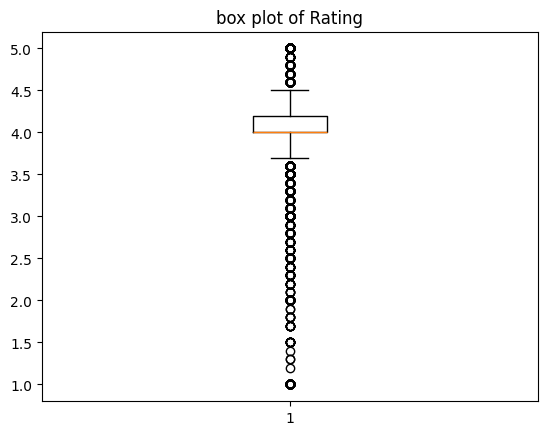

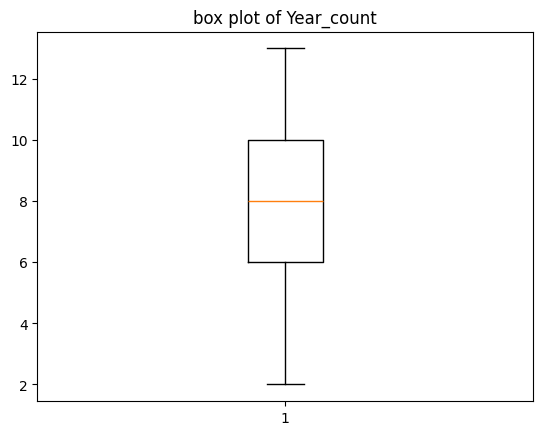

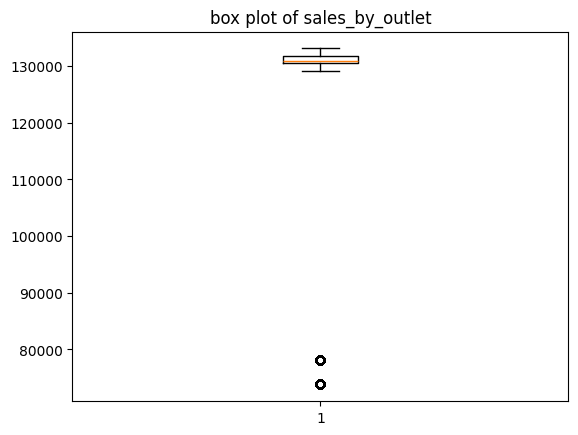

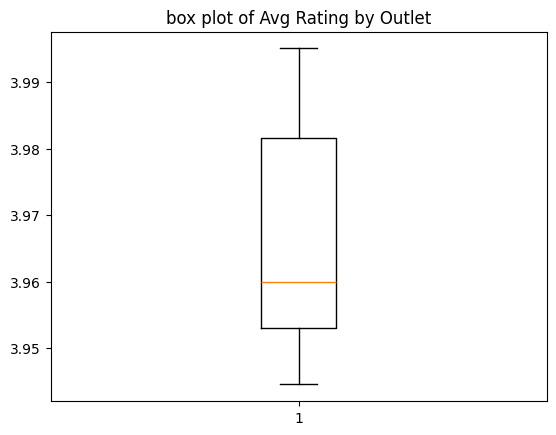

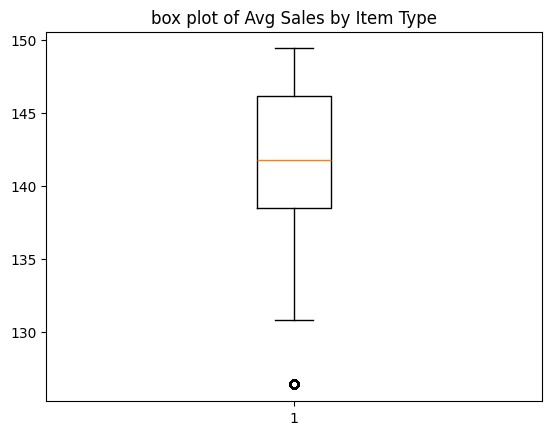

In [77]:
#Numerical Column Boxplot->useful for identifying outliers and understanding the spread of data.
for i in num_l:
  plt.boxplot(df[i])
  plt.title(f"box plot of {i}")
  plt.show()

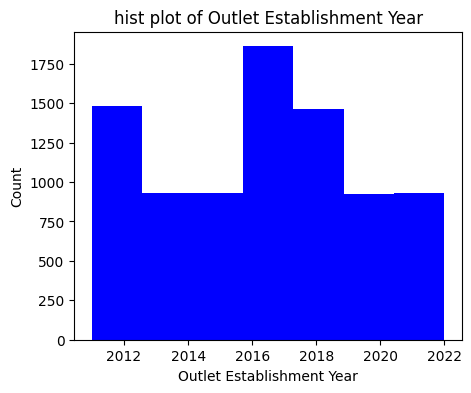

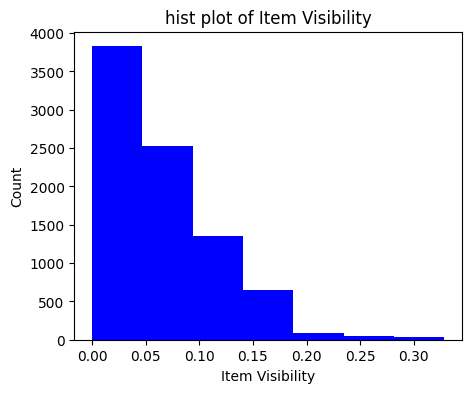

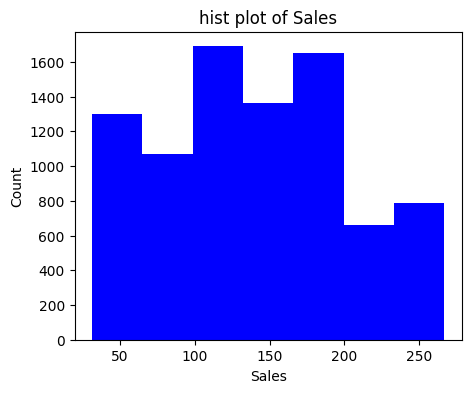

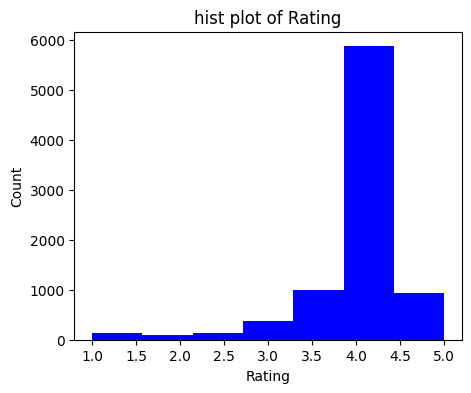

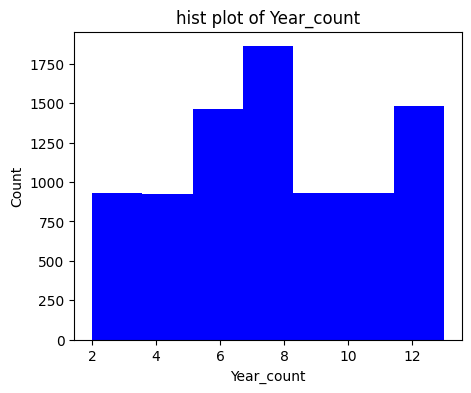

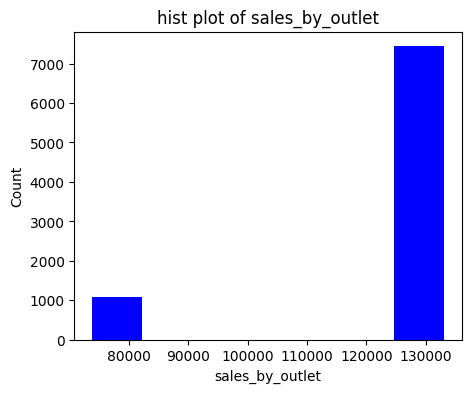

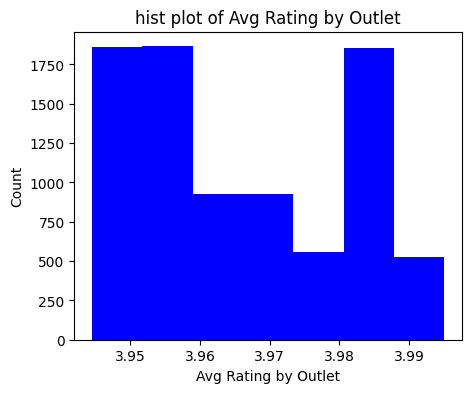

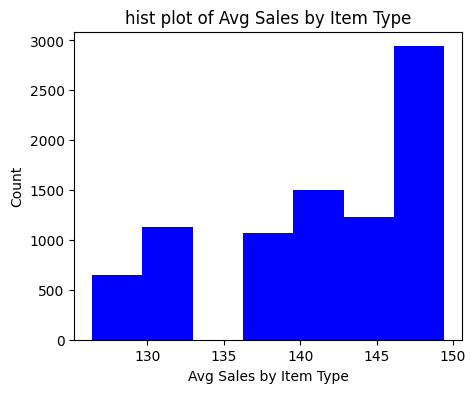

In [78]:
#Numerical column Histplot->gives a KDE (Kernel Density Estimate) to understand the distribution.
for i in num_l:
  plt.figure(figsize=(5,4))
  plt.hist(df[i], bins=7,color='blue')
  plt.title(f"hist plot of {i}")
  plt.xlabel(f"{i}")
  plt.ylabel('Count')
  plt.show()

In [79]:
#Categorical Column Value Count->gives you the frequency of each category.
for col in obj_l:
    print("univariate analysis of categorical column:")
    print(df[col].value_counts())
    print(f'Number of unique categories:{df[col].nunique()}')
    print("__________________________________________________")
    print()

univariate analysis of categorical column:
Item Fat Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64
Number of unique categories:2
__________________________________________________

univariate analysis of categorical column:
Item Identifier
FDW13    10
FDG33    10
FDF56     9
FDF52     9
FDV38     9
         ..
FDK57     1
FDO33     1
DRF48     1
FDC23     1
FDE52     1
Name: count, Length: 1559, dtype: int64
Number of unique categories:1559
__________________________________________________

univariate analysis of categorical column:
Item Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast  

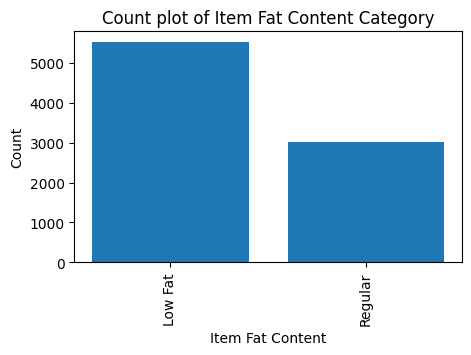

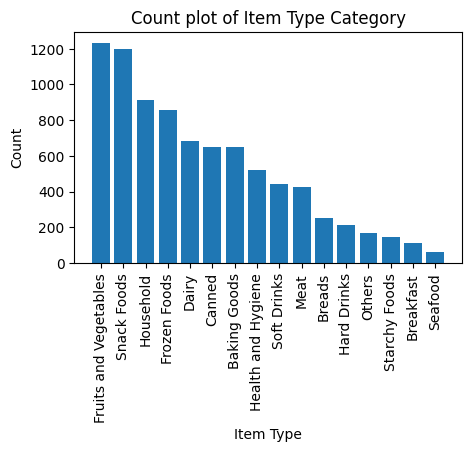

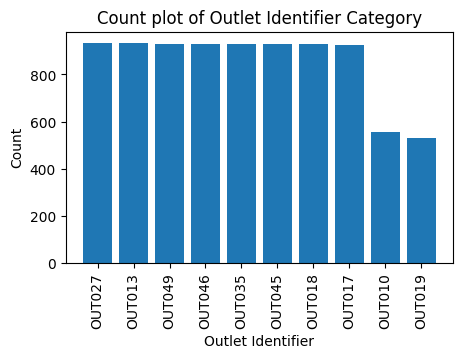

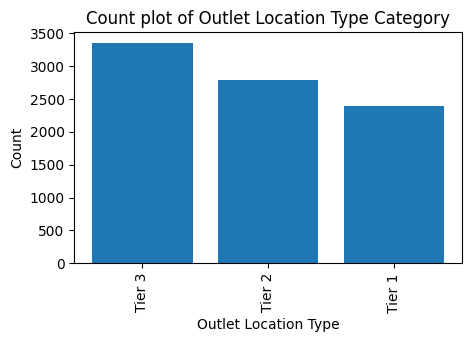

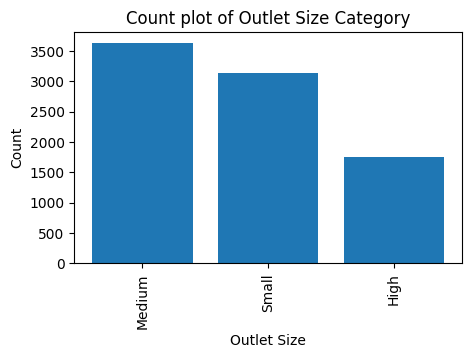

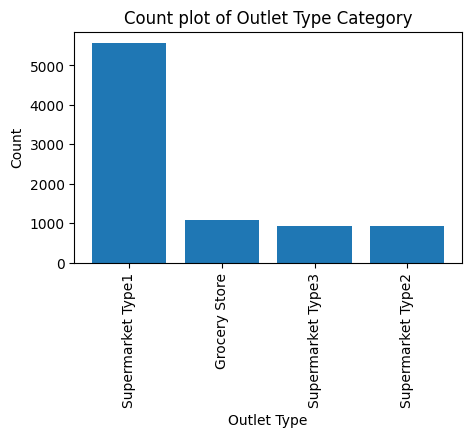

In [80]:
# In univariate categorical analysis we use bar plot(also known as count plot) for visualizations->gives the frequency distribution of each category in the column.
for i in obj_l:
  if df[i].nunique()<=17:  #Unique categories
    plt.figure(figsize=(5,3))
    plt.bar(x=df[i].value_counts().index,height=df[i].value_counts())
    plt.title(f'Count plot of {i} Category')
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.show()

**Bivariate Analysis**

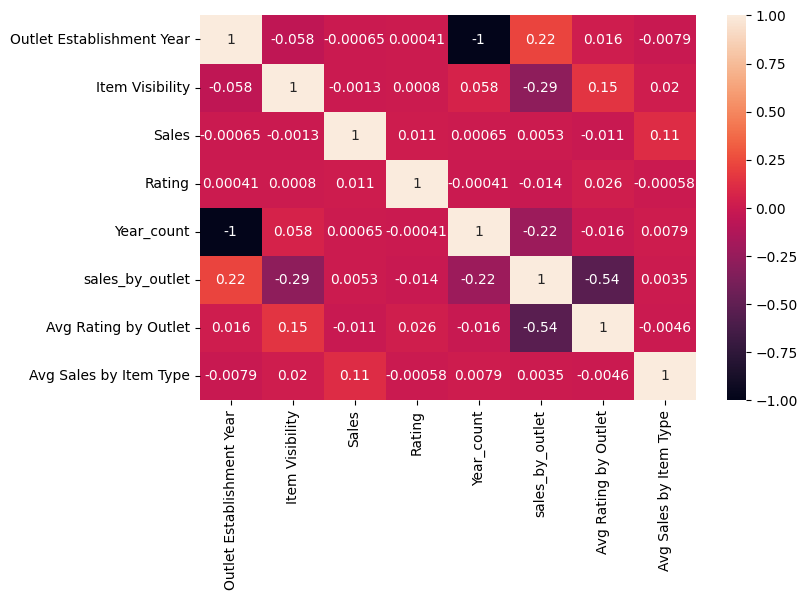

In [81]:
var1=df.corr(numeric_only=True)
plt.figure(figsize=(8,5))
sns.heatmap(var1,annot=True)
plt.show()

1.Year Count & Outlet Establishment Year(-1): This is because "Year Count" is derived from "Outlet Establishment Year".

2.Item Visibility shows weak correlations with most variables, suggesting it has minimal direct linear relationships with other numerical features.

3.As the outlet gets older (Year Count increases), sales tend to slightly decrease, but the weak correlation suggests other factors likely have a stronger impact on sales.

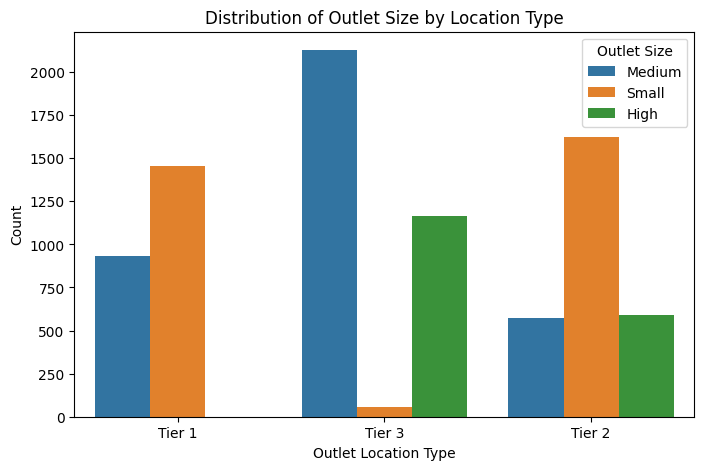

In [82]:
#Relationship between Outlet Location Type and Outlet Size(Count Plot)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Outlet Location Type', hue='Outlet Size')
plt.title('Distribution of Outlet Size by Location Type')
plt.xlabel('Outlet Location Type')
plt.ylabel('Count')
plt.legend(title='Outlet Size')
plt.show()

<ipython-input-83-5c25050d1895>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fat_content_sales, x='Item Fat Content', y='Sales', palette='Blues_d')


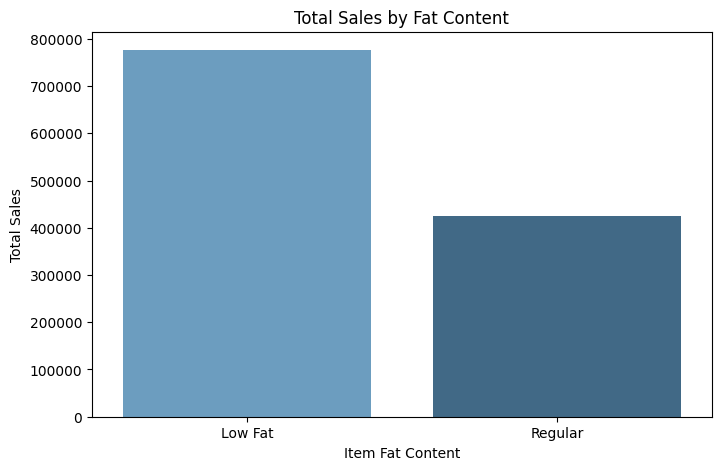

                   count       mean        std      min      25%       50%  \
Item Fat Content                                                             
Low Fat           5517.0  140.71410  62.311756  31.2900  94.4778  142.0812   
Regular           3006.0  141.50426  62.214786  32.0558  92.2212  144.0444   

                       75%       max  
Item Fat Content                      
Low Fat           185.0898  266.8884  
Regular           186.5214  266.8884  


In [83]:
# Grouping by 'Item Fat Content' and summing the total sales
fat_content_sales = df.groupby('Item Fat Content')['Sales'].sum().reset_index()

# Visualizing the impact of Fat Content on total sales
plt.figure(figsize=(8, 5))
sns.barplot(data=fat_content_sales, x='Item Fat Content', y='Sales', palette='Blues_d')
plt.title('Total Sales by Fat Content')
plt.xlabel('Item Fat Content')
plt.ylabel('Total Sales')
plt.show()

# Calculate summary statistics for sales based on fat content
fat_content_sales_stats = df.groupby('Item Fat Content')['Sales'].describe()
print(fat_content_sales_stats)


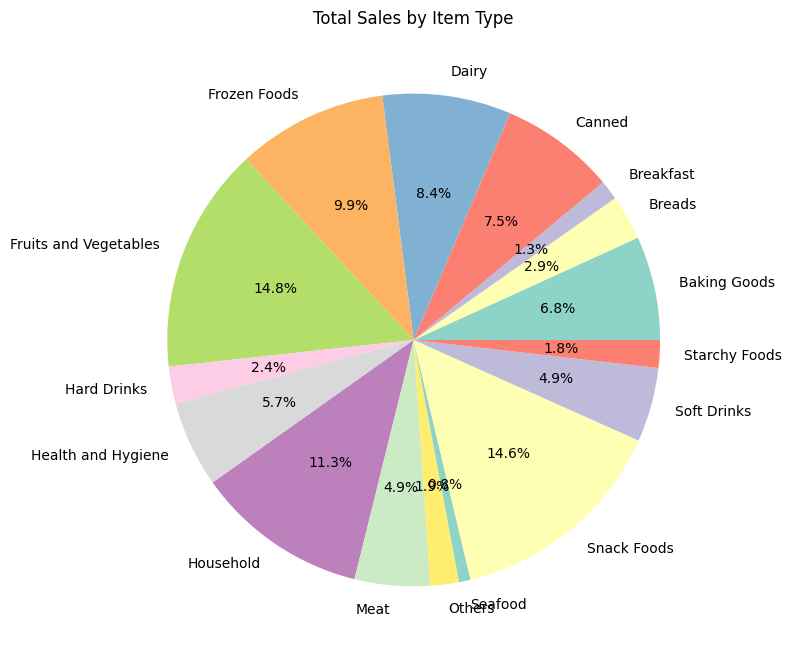

In [84]:
sales_by_item_type = df.groupby('Item Type')['Sales'].sum()
plt.figure(figsize=(8, 8))
sales_by_item_type.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set3', len(sales_by_item_type)))
plt.title('Total Sales by Item Type')
plt.ylabel('')
plt.show()


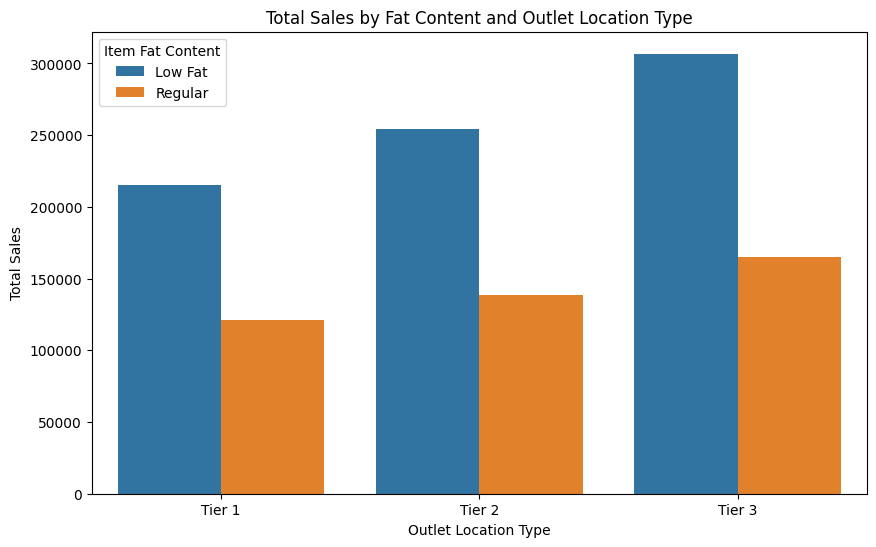

In [92]:
fat_content_sales = df.groupby(['Item Fat Content', 'Outlet Location Type'])['Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=fat_content_sales, x='Outlet Location Type', y='Sales', hue='Item Fat Content')
plt.title('Total Sales by Fat Content and Outlet Location Type')
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.show()

<ipython-input-89-1900a4eef2c1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_establishment.index, y=sales_by_establishment.values, palette='viridis')


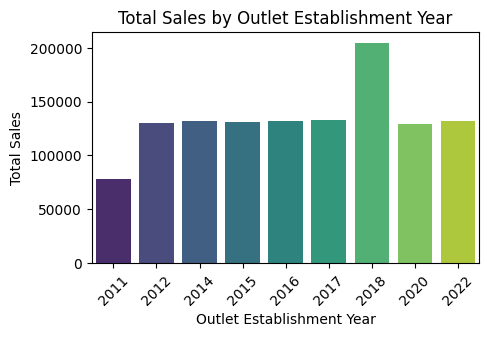

In [89]:
sales_by_establishment = df.groupby('Outlet Establishment Year')['Sales'].sum()
plt.figure(figsize=(5,3))
sns.barplot(x=sales_by_establishment.index, y=sales_by_establishment.values, palette='viridis')
plt.title('Total Sales by Outlet Establishment Year')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()